**Gender Pay Gap Inequality in the U.S. and Potential Insights**

A Research Project at NYU's Stern School of Buinsess — May 2016    
Written by Jerry "Joa" Allen (joa218@nyu.edu)

**Abstract** 

Although it has been a longstanding issue, the gender pay gap has been an especially touched upon topic in recent times. There's the well-quoted statistic stating women earn 77% as much as their male counterparts in exchange for equal work. However, this statistic is met with contention from various economists. Some claim that women having less pay for equal work is possibly true in certain cases, but it is not by and large the case. This paper is meant to provide insights as it pertains to potential drivers of the gender pay gap.

**Acessing and Parsing the Data**

I decided to access the 2014 American Time Use Study, which is the most recent year available. The dataset I manipulate is the ATUS Activity Summary File. In brief, this file mostly outlines how respondents spent their time as it pertains to various activities, ranging from sleep to eldercare. Moreover, the file also contains information regarding the sex (ie. unfortunately gender was unavailable) of the respondents, amongst other demographic information. What I am largely interested in is investigating gender equality (or lack thereof) when it comes to labor force status, hours worked, childcare, and eldercare. Moreover, I will also weigh in on the implications these insights have on the gender
pay gap. With that in mind, I plan to produce figures which will concisely compare men and women along the variables mentioned above. 

In terms of accessing the data, it is available on http://www.bls.gov/tus/datafiles_2014.htm, and under the ATUS Activity Summary zip. Furthermore, descriptions of the column variables and their units of measurement can be found at http://www.bls.gov/tus/atuscpscodebk14.pdf and http://www.bls.gov/tus/atusintcodebk14.pdf.

In [14]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn.apionly as sns          # matplotlib graphics (no styling)


# these lines make our graphics show up in the notebook
%matplotlib inline             

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.1 |Anaconda 2.5.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.17.1
Today:  2016-05-13


In [15]:
atus = (pd.read_csv('/Users/JOA/Documents/Academics/NYU/Spring 2016/Data_Bootcamp/atussum_2014/atussum_2014.dat'))

In [16]:
atus['TESEX'] = atus['TESEX'].replace({1: 'Male', 2:'Female'})
atus['TELFS'] = atus['TELFS'].replace({1: "Employed(at work)", 2: "Employed(absent)",
                                        3:'Unemployed(on layoff)', 4: 'Unemployed(looking)',
                                        5: "Not in labor force"})#TELFS refers to labor force status

In [17]:
atus = atus.set_index('TESEX')
atus.index.name = 'Sex'

In [18]:
atus = atus[['TEHRUSLT', 'TELFS', 'TRERNWA', 'TRTEC', 'TRTHH']]
atus = atus.replace(to_replace=[-1], value=[None]) # -1 represents blank answers
atus = atus.replace(to_replace=[-2], value=[None]) # -2 represents a "don't know" answer
atus = atus.replace(to_replace=[-3], value=[None]) # -3 represents a refuse to answer
atus = atus.replace(to_replace=[-4], value=[None]) # -4 represents an "hours vary" answer that is of no use

In [19]:
atus['TRERNWA'] = atus['TRERNWA']/100 #TRERNWA measures weekly income. The original values implied 2 decimal places

In [20]:
atus = atus.rename(columns={'TEHRUSLT':'Hours Worked/Wk','TELFS':'Labor Force Status', 'TRERNWA':'Main Job Income/Wk'
                            ,'TRTEC': 'Elderly Care (mins)','TRTHH':'Secondary Child Care (mins)'})

In [21]:
atus['Sex'] = atus.index
atus.columns = ['Hours Worked/Wk', 'Labor Force Status', 'Main Job Income/Wk',
       'Elderly Care (mins)', 'Secondary Child Care (mins)', 'Sex'] #added in Sex as column for sns plot purposes

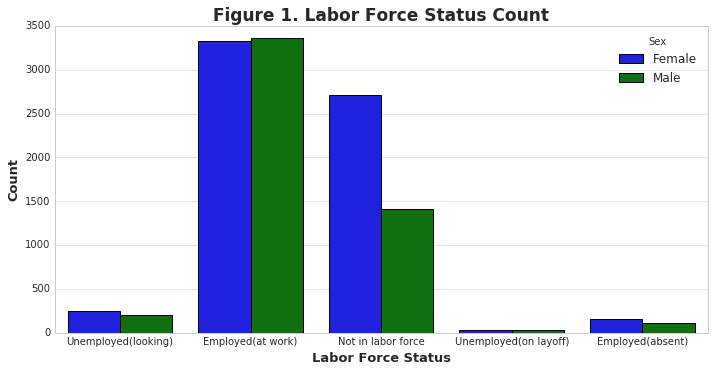

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 5.5)
ax.set_title('Figure 1. Labor Force Status Count', weight = 'bold', fontsize = 17)
sns.countplot(x= 'Labor Force Status', hue='Sex', data= atus)
plt.xlabel('Labor Force Status',weight='bold',fontsize=13)
plt.ylabel('Count',weight='bold', fontsize=13)

**Labor Force Status**

The notion of women making up to 23 less cents on the dollar than men has been challenged numerous times. Many claim, including Resident Fellow at the Harvard Institute of Politics, Karen Agness, that this statistic in manipulated and misled by popular media and the government. The extent of systemic discrimination on women in the U.S. suggested by this statistic is far from conclusive, as it does not take into account the many factors that are producing this number. Figure 1 illustrates the difference in labor force placement between men and women. It is worth noting that there were 20% more female respondents in this survey, such that the female count is inflated compared to that of males. Even when adjusting for greater number of female respondents, there is about 25% more females not in the labor force than males. Naturally, this kind of discrepancy in labor force status is likely to contribute to the overall gender pay gap we are witnessing in the U.S. Moreover, the number of men and women unemployed and looking are nearly the same. Although it may not debunk, this insight discredits the notion of systemic hiring discrimination considering there are more women not working, but there are not more women looking for a job. If there was systemic hiring discrimination against women, there would presumably be a greater share of women looking for a job than men.

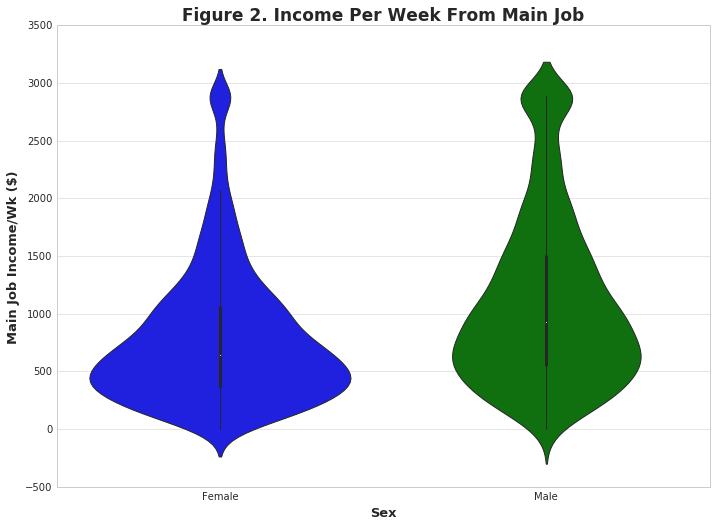

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax.set_title('Figure 2. Income Per Week From Main Job', weight='bold', fontsize = 17)
sns.set_style("whitegrid")
sns.violinplot(x='Sex',y='Main Job Income/Wk', data = atus)
plt.xlabel('Sex',weight='bold',fontsize=13)
plt.ylabel('Main Job Income/Wk ($)',weight='bold', fontsize=13)

**Differences in Main Stream of Income** 

Figure 2 clearly illustrates men earning more income than women. There's a sizable share of women earning less than 500/week, while there are very few making more than 1500/week. On the other hand, the men's income is a more evenly distributed, as opposed to being as bottom heavy as women's income. The interquartile range of men is about 1000 compared to about 600 for women. Furthermore, the figure clearly portrays men having a lot more of an income upside, as the upper quartile of women is about 1000, while the upper quartile of men is about 1500 (ie. displayed in the black lines within the axes objects). This difference in income is just as stark, when observing the top earners between men and women, as the top earner for men (about 2900) is about 30% more than his women counterpart. If nothing else, this figure reinforces the fact that men make more money than women, and their income is more widely distributed. The below figures will provide potential drivers for this inequality as it pertains to differences in time use between men and women.

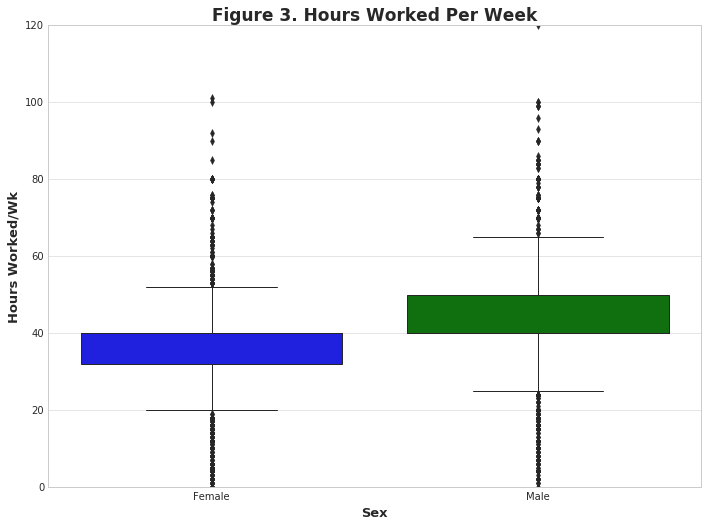

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax.set_title('Figure 3. Hours Worked Per Week', weight='bold',fontsize = 17)
sns.set_style('whitegrid')
sns.boxplot(x='Sex', y='Hours Worked/Wk', data= atus)
plt.xlabel('Sex',weight='bold',fontsize=13)
plt.ylabel('Hours Worked/Wk',weight='bold', fontsize=13)

**Differences in Hours Worked**

One obvious factor to investigate is the number of hours worked for both men and women. This will surely have an impact on the earnings for each sex. Figure 3 shows that males work considerably more hours than females. A clear indicator of this is the upper quartile for women being 40 hours/week is virtually equal to the lower quartile for men. It does not require statistical analysis to presume the more hours one works, the more income that person tends to earn. This perhaps explains, at least to some degree, the stark difference in incomes between men and women, shown in the Figure 2. However, the question remains what women are spending their time doing more than men if they are not working more hours than men. The implication is that women are enduring certain responsibilities (ie. more so than men) that take up their time, and this in turn has a negative impact on their income.

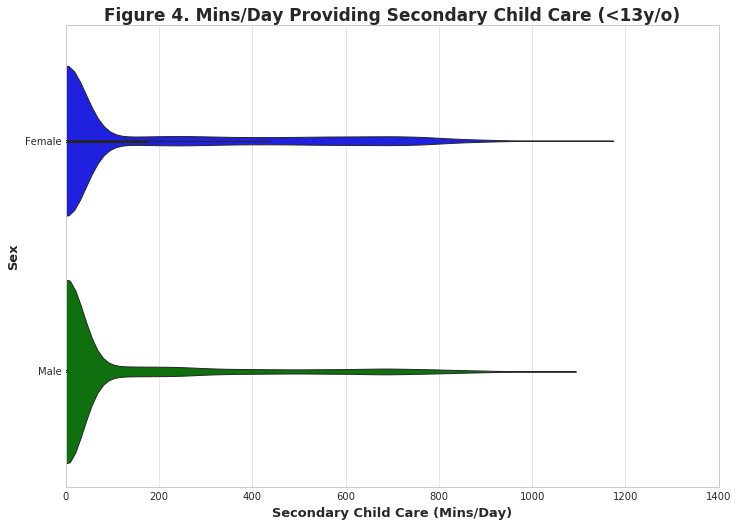

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax.set(xlim=(0, 1400))
ax.set_title('Figure 4. Mins/Day Providing Secondary Child Care (<13y/o)', weight='bold', fontsize = 17)
sns.violinplot(data= atus, x='Secondary Child Care (mins)', y='Sex')
plt.xlabel('Secondary Child Care (Mins/Day)',weight='bold',fontsize=13)
plt.ylabel('Sex',weight='bold', fontsize=13)

**The Differences in the Time Spent Providing Child Care**

Secondary child care is referring to time spent looking after children, while taking on something else as a primary activity. In sum, it is keeping a watchful eye over children, without providing one's full and undivided attention. Harvard Economics Professor, Claudia Goldin postulated that women providing more family care is a potential reason for the pay gap. Moreover, she touched upon research that viably suggests that women value temporal flexibility more than men, while men value income more than women. Figure 4 displays that women provide secondary child care more than men, as over 25% provide more than 200 minutes/day of such care. The fat tail on blue object depicts that their is a great deal of women providing hundreds of minutes of child care each day. Resultantly, the women who have these responsibilities are presumably earning less income than men and women who do not.

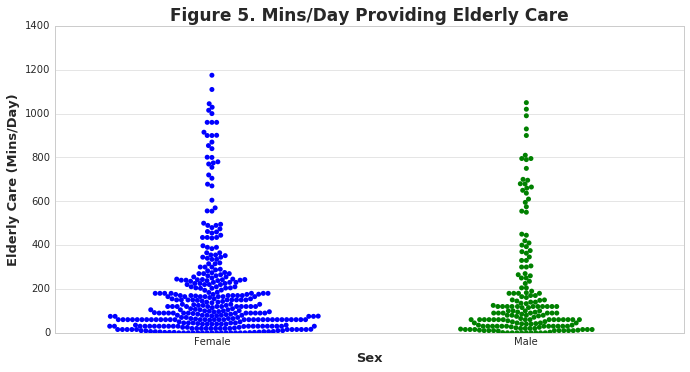

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(11.27, 5.5)
ax.set(ylim=(0, 1400))
ax.set_title("Figure 5. Mins/Day Providing Elderly Care", weight='bold',fontsize = 17)
sns.set_style("whitegrid")
sns.swarmplot(x='Sex', y='Elderly Care (mins)', data= atus)
plt.xlabel('Sex',weight='bold',fontsize=13)
plt.ylabel('Elderly Care (Mins/Day)',weight='bold', fontsize=13)

**Differences in Time Spent Providing Elderly Care**

Related to the Figure 4, Figure 5 depicts females providing considerably more eldercare (ie. unrelated to employment) than their male counterparts. Granted, there is 20% more female respondents in the survey which makes the size of the blue object more accentuated. Nevertheless, there is still about twice as many females providing elderly care than men when accounting for the difference in number of respondents. This data supports Goldin's postulate of the women earning less than men are more likely to provide family care than men.

**Conclusion**

Although their is still much more analysis that can be done, this paper at least sheds light on the fact that the gender pay gap issue is much more convoluted and nuanced than typically given credit for. Far too often, blanketed statements are made regarding females getting paid less than men, without evaluating any specific underlying reasons. Instead, it is prevalent practice to use the loaded word, "discrimination," as reasoning for the matter. In fact, Former Director of the U.S. State Department, Anne-Marie Slaughter, finds that when you do not account for women with caregiving responsibilities, women earn only 5% less than men. 

Going forward, it would be worthwhile to further investigate the notion of women valuing temporal flexibility more than men, and men valuing income more than women. It would be interesting the further validate this assertion and learn if and how this disposition has changed over decades. If women are genetically predisposed to be more caregiving, then it may be a futile cause to completely close the gender pay gap given women would always tend to spend more time providing family care as opposed to earning income through working, compared to men. On the other hand, if women are at all pressured by social constructs to be more caregiving, then it would be worth thinking about potential solutions to eradicate this issue. In any case, it would be useful to further explore gender differences and inequities as a means to discover conclusive insights that can best mitigate any gender pay gap. 

**References**

Agness, Karen. "Don't Buy Into The Gender Pay Gap Myth." Forbes. Forbes Magazine, 12 Apr. 2016. Web. 11 May 2016.

Dubner, Stephen J. "The True Story of the Gender Pay Gap - Freakonomics." Freakonomics. N.p., 7 Jan. 2016. Web. 11 May 2016.

